# Generate power-law distributed prior over meanings

It has been found that in human numeral systems / numerosity perception, the numbers are distributed according to something close to: 

$$p(n) \propto n^{-\alpha}$$

Piantadosi (2016) finds that $\alpha \approx 2$ for some languages, citing Newman (2005).

Piantadosi ST. A rational analysis of the approximate number system. Psychon Bull Rev. 2016 Jun;23(3):877-86. doi: 10.3758/s13423-015-0963-8. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4889539/#FN5

Newman M. Power laws, Pareto distributions and Zipf's law. Contemporary physics. 2005;46(5):323–351. 


In [80]:
import torch
import matplotlib.pyplot as plt

In [81]:
num_states = 100
n = torch.arange(1, num_states+1)
alpha = 2.
p = torch.softmax(torch.pow(n, -alpha), dim=-1)
p

tensor([0.0265, 0.0125, 0.0109, 0.0104, 0.0102, 0.0100, 0.0100, 0.0099, 0.0099,
        0.0099, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
        0.0098])

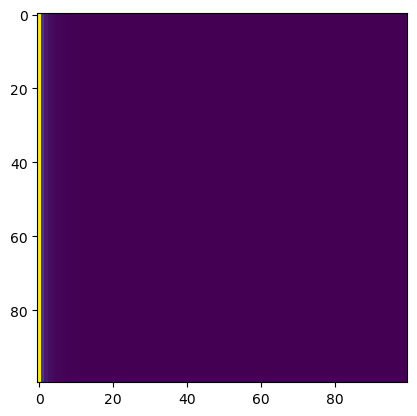

In [82]:
prior_stacked = torch.stack([p for _ in range(num_states)]) # add dummy y axis
plt.imshow(prior_stacked)

In [83]:
# compare to energy based distribution
gamma = 2
p = torch.softmax(10**gamma * torch.randn(num_states), dim=-1)
p

tensor([1.3390e-19, 3.4577e-31, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7731e-22, 0.0000e+00, 0.0000e+00,
        3.0525e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6811e-40,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9364e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4476e-40, 1.5434e-30, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.6114e-22, 0.0000e+00, 0.0000e+00, 2.1176e-18,
        0.0000e+00, 2.1711e-29, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2191e-43, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0619e-38,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7202e-22, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

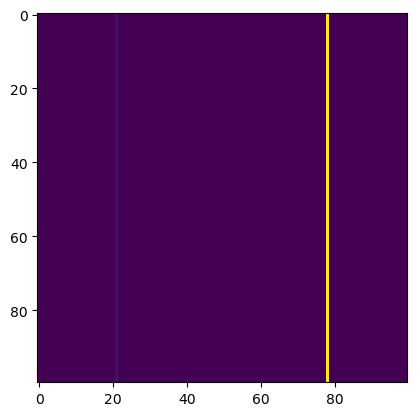

In [84]:
plt.imshow(torch.stack([p for _ in range(num_states)]))

save some priors to csvs

In [87]:
import pandas as pd

def make_and_save_prior(num_states, alpha, fn):
    states = torch.arange(1, num_states+1)
    prior = torch.softmax(torch.pow(states, -alpha), dim=-1)
    df = pd.DataFrame(states, columns=["name"])
    df["probability"] = prior
    df.to_csv(fn)

# make_and_save_prior(10, 2., "10_power_2.csv")
# make_and_save_prior(100, 2., "100_power_2.csv")
# make_and_save_prior(200, 2., "1ball_200_power_2.csv")
# make_and_save_prior(300, 2., "2ball_300_power_2.csv")